In [1]:
%matplotlib inline

from bokeh.io import output_notebook
output_notebook()
#Add legends

BokehJS successfully loaded.

<h1 style="text-align:center;">Data Visualization within the Python Ecosystem </h1>
<h2 style="text-align:center;"> Thoth Gunter</h2>
<h2 style="text-align:center;"> Python @ CERN</h2>


## About me
* 3rd Graduate Student from Northwestern University
* working on CMS
* python fanatic 


### Contact me:
@xcopyfgc

### Slides at:
<https://github.com/TKGgunter/presentations>

#### Obligatory Python 3 shoutout 

### How to install packages
pip install PACKAGE-NAME 

- bokeh
- pygal
- pandas


## The Joy of Python
<img src="http://www.abc.net.au/reslib/201003/r535857_3079187.jpg" height="600" width="600" align="middle" />

### For Data Analysis Python provides ...
- flexibility 
- an extensive set of computational packages (scipy, scikit-learn, ...)
- interfaces well with many different data storage options

## Whats the point if you can't show your findings

## There is a plethora of plotting packages within python
- Seaborn
- Vispy
- ggplot
- pygal
- ggplot
- Veusz 
- Chaco 
- diaGrabber 
- BLT
- PyQwt
- GUIQwt 
- DISLIN 
- Mayavi
- gdmodule 
- pgplot
- Py-OpenDX 
- VTK 
- RPy 
- R/SPlus 
- PyX
- Biggles 
- Pychart
- PyNGL
- pygooglechart
- WHIFF 
- PyQtGraph  
- pyla 

## Where do I start?

## Pandas Tangent
### Pandas is a a data structure and analysis library. 
<img src="http://wdy.h-cdn.co/assets/16/05/980x490/landscape-1454612525-baby-pandas.jpg" height="600" width="700" align="middle" />

In [3]:
from bokeh.sampledata.iris import flowers
flowers.sample(10).head()

sepal_length  sepal_width  petal_length  petal_width     species
9            4.9          3.1           1.5          0.1      setosa
96           5.7          2.9           4.2          1.3  versicolor
31           5.4          3.4           1.5          0.4      setosa
38           4.4          3.0           1.3          0.2      setosa
47           4.6          3.2           1.4          0.2      setosa

## Packages we'll be covering in this talk

These are some of the most popular, stable packages; which offer solutions to a diverse number of use cases

- MatPlotLib
- Bokeh
- <strike>Plotly</strike> Pygal

## MatPlotLib
Is python standard plotting library. 

Pros:
- Intigrated into most analysis packages ( Pandas, SciKitLearn, ... etc)
- It offers a full suite of plotting tools ( scatter, bar, hist, ..., 2D, 3D, latex fonts)
- Plots can be easily exported to various formats (png, jpg, pdf, ...)
- Large user base


    

Cons:
- Unintuitive
- Default plots are not pretty
- Plots are not internet ready

*Seaborn, ggplot, and other packages are built on top of MatPlotLib*

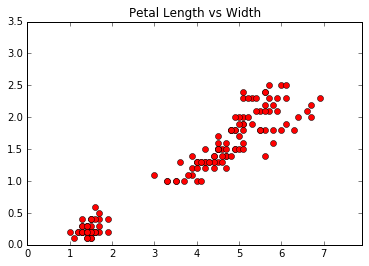

In [19]:
import matplotlib.pyplot as plt
x = flowers.petal_length #List of floats
y = flowers.petal_width #List of floats
plt.plot(x , y, 'ro')
plt.axis([0, flowers.petal_length.max() + 1, 0, flowers.petal_width.max() + 1])
plt.title('Petal Length vs Width')
plt.show()

## Basics of pyplot 

#### Plot types
plot, bar, box, pie, polar, imread, hist, ...

*for 3d plots mpl_toolkits.mplot3d *

#### Basic plot attributes
xlabel, ylabel, title, axis, semilogx, semilogy, ...

**Beware of subplots**

http://matplotlib.org/api/pyplot_summary.html

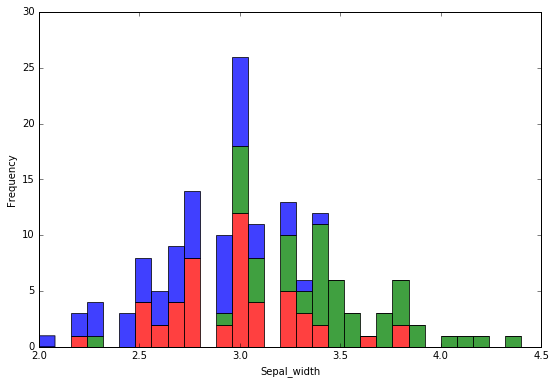

In [22]:
plt.figure(figsize=(9,6))
x_1 = flowers[ (flowers.species == "virginica") ].sepal_width
x_2 = flowers[ (flowers.species == "setosa") ].sepal_width
x_3 = flowers[ (flowers.species == "versicolor") ].sepal_width
n_, bins_, patches_ = plt.hist([x_1, x_2, x_3], 30, stacked=True, rwidth=1,
                               alpha=0.75, color=['red', 'green', 'blue'

plt.xlabel('Sepal_width')
plt.ylabel('Frequency')
plt.show()

## Using MatPlotLib through Pandas

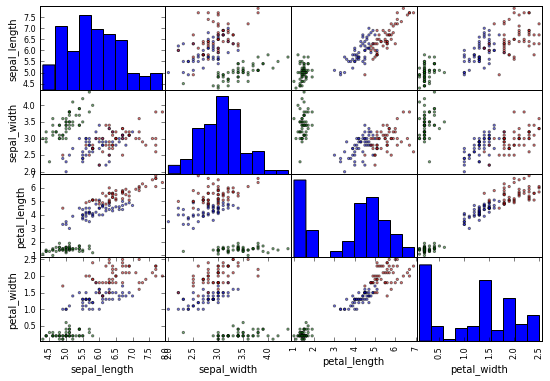

In [5]:
import pandas as pd
colors = ["red", "green", "blue"]
types = ["virginica", "setosa", "versicolor" ]
colors_ = [ colors[types.index(x)] for x in flowers.species]

pd.tools.plotting.scatter_matrix(flowers, alpha=.5, figsize=(9,6),
                                 c= flowers.species.apply(lambda x:colors[types.index(x)]));

## Pandas plots
Plots can be made directly from pandas dataframes and series

```python
flowers["column_name"].plot()
flowers.plot()
```
You can leverage all of matplotlib plotting types as well as additional. (Scatter Matrix, Andrews Curves, Lag plots, ...)

## Bokeh
Is a package that build to make internet ready plots

Pros:
- Intuitive
- Produces interative plots in a static html form
- bokeh server for more complicated interactivity
- Active development (Webgl integration in the works)


Cons:
- No easy way to get static images of plots
- No 3D plots
- The real strength of the package requires knowledge html, css, and javascript

*Plotly for similiar functionality with 3d plotting*

## The Bokeh flowchart
- High Level Charts
- Basic Glyph Based Plotting
- Low Level Models


In [80]:
from bokeh.charts import Scatter
from bokeh.io import show

p = Scatter(flowers, x='sepal_length', y='sepal_width', color='species', legend='top_left')
show(p);

## bokeh.charts
- Area
- Bar
- Box
- Donut
- Heatmap
- Line
- Histogram

### Mid level figures and JS callbacks

In [13]:
from bokeh.io import vform
from bokeh.plotting import figure
from bokeh.models import CustomJS, ColumnDataSource, Toggle

dataframe = ColumnDataSource(flowers)
data_ = ColumnDataSource(data=dict(sepal_length=[], sepal_width=[]))
p = figure(plot_width=400, plot_height=400, tools="box_zoom", title="Subselections", x_range=(4,8), y_range=(1.5,4.5));
p.circle('sepal_length', 'sepal_width', size=8, source=data_, alpha=0.4,);

In [14]:
callback = CustomJS(args=dict(source= dataframe, plot_data=plot_data), code="""
    var data= source.get('data');
    var data__= plot_data.get('data');
    var label = cb_obj.get('name');
    x = data['species']
    data__['sepal_length'] = []
    data__['sepal_width'] = []
    for(i = 0; i < x.length; i++){
        if(x[i] == label ){
            data__['sepal_length'].push(data['sepal_length'][i]);
            data__['sepal_width'].push(data['sepal_width'][i]);
        }
    }
    plot_data.trigger('change');
    """)

    

In [15]:

checkbox_button_3 = Toggle( label = "virginica" , callback=callback, name='virginica', active = True)
checkbox_button_2 = Toggle( label = "versicolor" , callback=callback, name='versicolor', active = True)
checkbox_button_1 = Toggle( label = "setosa" , callback=callback, name='setosa', active = True)

layout = vform(checkbox_button_1, checkbox_button_2, checkbox_button_3, p)

show(layout);    

## Server example:
[Sarah Bird PyCon 2015](https://www.youtube.com/watch?v=O5OvOLK-xqQ&index=6&list=LLABoYor0BYe94swDr9dQpMg)
<img src="http://img.youtube.com/vi/O5OvOLK-xqQ/0.jpg"/>

## Pygal
is a packaged used to create svg graphics

Pros:
- Very easy to get started with
- Plots can be saved to everything from png to svg
- Default plots look good and it's easy to alter styling with a bit of css

Cons:
- Does not offer any of high level plot
- small user base
- based around niche format

In [49]:
#["virginica", "setosa", "versicolor" ]
virginica = flowers[flowers.species == "virginica"]
setosa = flowers[flowers.species == "setosa"]
versicolor = flowers[flowers.species == "versicolor"]

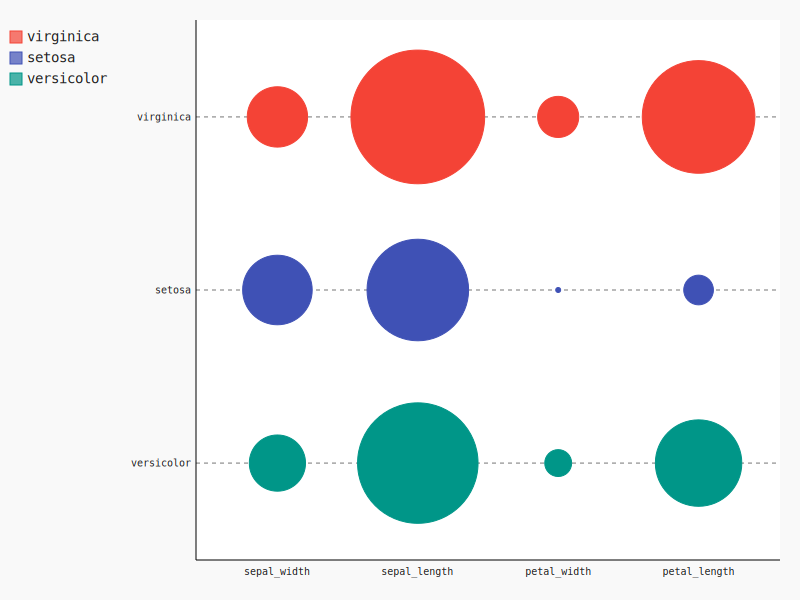

In [76]:
from IPython.display import SVG, display
from pygal.style import Style
import pygal

bar_chart = pygal.Dot() 
bar_chart.x_labels = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

bar_chart.add('virginica', [virginica[feature].mean() for feature in bar_chart.x_labels])
bar_chart.add('setosa', [setosa[feature].mean() for feature in bar_chart.x_labels])
bar_chart.add('versicolor', [versicolor[feature].mean() for feature in bar_chart.x_labels])

display( SVG(bar_chart.render()))

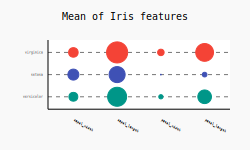

In [79]:
style = Style(label_font_size=3, title_font_size=10 )
bar_chart = pygal.Dot(height=150, width=250, show_legend = False,
                      title=u'Mean of Iris features', x_label_rotation=30, style = style) 

bar_chart.x_labels = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
bar_chart.add('virginica', [virginica[feature].mean() for feature in bar_chart.x_labels])
bar_chart.add('setosa', [setosa[feature].mean() for feature in bar_chart.x_labels])
bar_chart.add('versicolor', [versicolor[feature].mean() for feature in bar_chart.x_labels])
display( SVG(bar_chart.render()))

## Pygal Chart types
- Line
- Bar
- XY (Scatter)
- Pie
- Radar
- Box 
- Gauge
- Tree
- Maps

## High Preformance Plotting

## Conclusion
When to use what?
- Matplotlib for initial look into the data
- Bokeh for web implementaion
- Pygal for working with graphics designers

<div align="center">
    <img src="http://www.ouellette001.com/PapiersPeints/images/Iris_versicolor_018_1280.jpg" alt="" width=200 hight=200 align="right" style="float:right"/>
    <img src="http://www.fs.fed.us/wildflowers/beauty/iris/Blue_Flag/images/iris_virginica_virginica_lg.jpg"width=150 alt="" width=200 hight=200 align="left" style="float:left"/>
    <div id="content" align="center"> 
    <img src="http://www.badbear.com/signa/photos/Iris-setosa-23.jpg" alt="" width=200 hight=200 align="center" />
    </div>
</div>